In [1]:
import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
from collections import defaultdict

# import gensim
# from gensim.utils import simple_preprocess
# import gensim.corpora as corpora
# import nltk
# from nltk.corpus import stopwords
# import spacy
# from gensim.models import CoherenceModel
# import pyLDAvis.gensim
# import pyLDAvis
# import warnings
# import matplotlib.pyplot as plt

# nltk.download('stopwords')

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
file_path = 'C:/Users/fahad/OneDrive - Oulun yliopisto/Documents/suomi24/Data/suomi24.csv'
df = pd.read_csv(file_path)
# df

In [3]:

# Basic text preprocessing
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with single space
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lower case
    return text

# Apply preprocessing to the 'thread_text' column
df['processed_text'] = df['thread_text'].astype(str).apply(preprocess_text)


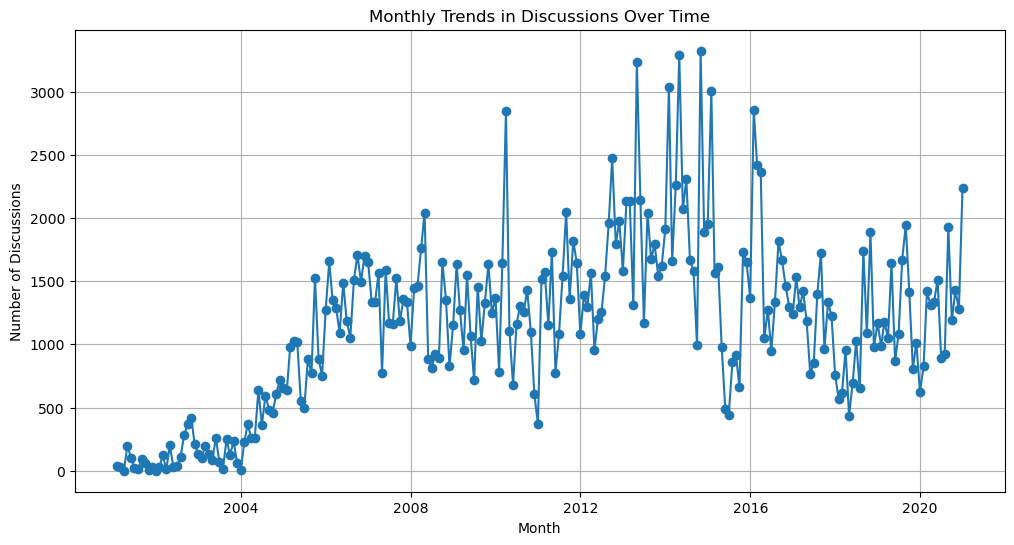

In [4]:
# Convert 'datetime' column to datetime type for easier manipulation
df['datetime'] = pd.to_datetime(df['datetime'])

# Group data by month and count occurrences
monthly_trends = df.set_index('datetime').resample('M').count()['processed_text']

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends.index, monthly_trends.values, marker='o', linestyle='-')
plt.title('Monthly Trends in Discussions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Discussions')
plt.grid(True)
plt.show()


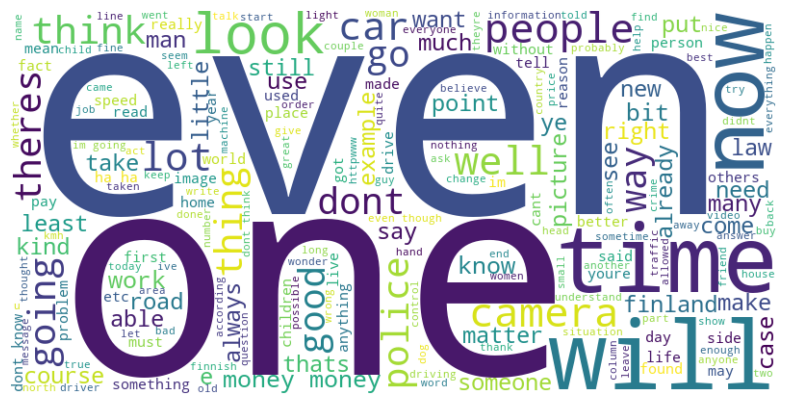

In [5]:
# Generate a word cloud for the most common words in discussions
text = ' '.join(df['processed_text'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


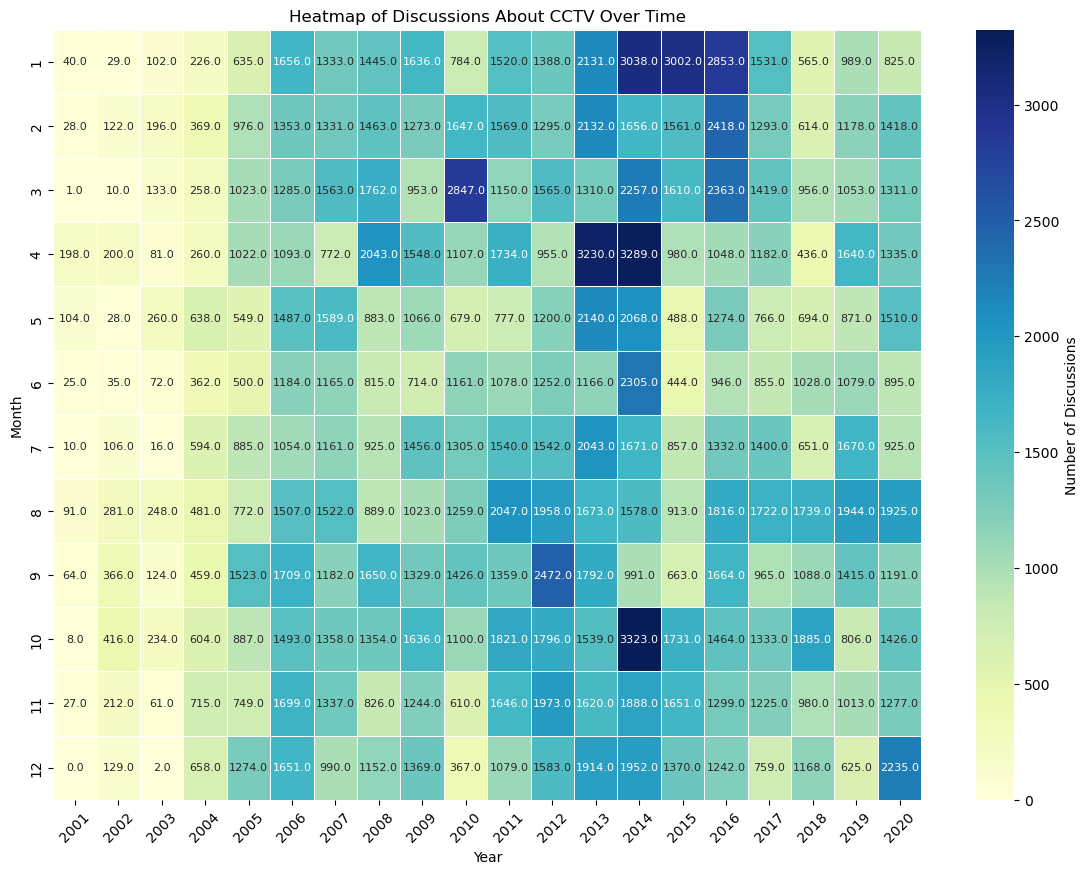

In [8]:
# Extract year and month
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

# Group data by year and month and count occurrences
yearly_monthly_trends = df.groupby(['year', 'month']).count()['processed_text']

# Ensure the index includes all years and months up to 2020
full_index = pd.MultiIndex.from_product([range(2001, 2021), range(1, 13)], names=['year', 'month'])
yearly_monthly_trends = yearly_monthly_trends.reindex(full_index, fill_value=0)

# Convert to a DataFrame and reset the index
yearly_monthly_trends_df = yearly_monthly_trends.reset_index()

# Pivot the DataFrame
heatmap_data = yearly_monthly_trends_df.pivot_table(index='month', columns='year', values='processed_text', fill_value=0)

# Display the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f", annot_kws={"size": 8}, linewidths=.5, cbar_kws={'label': 'Number of Discussions'})
plt.title('Heatmap of Discussions About CCTV Over Time')
plt.xlabel('Year')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.show()

C:\Users\fahad\AppData\Local\Temp\ipykernel_24800\3122099993.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_counts.values, y=keyword_counts.index, palette='viridis')


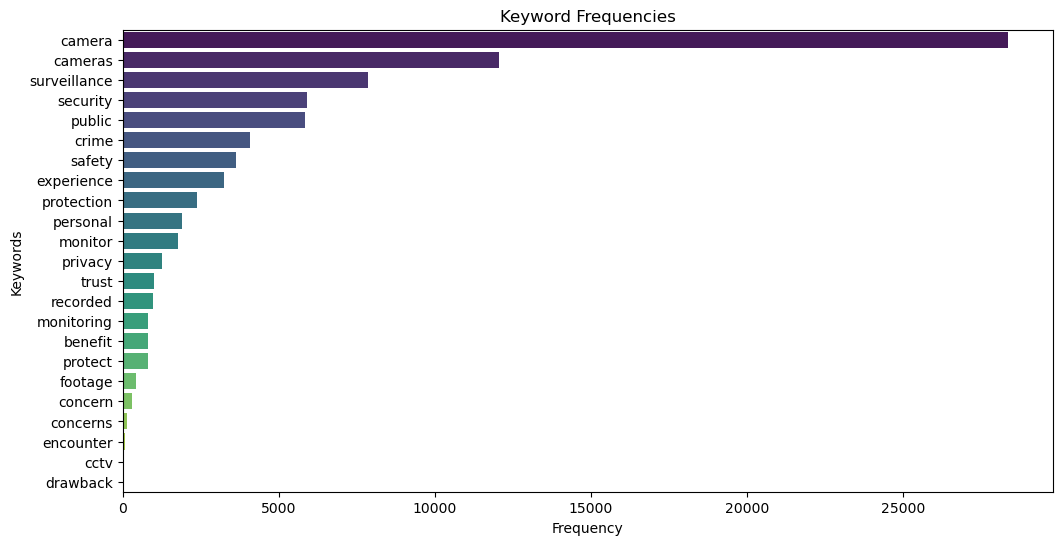

In [10]:
# Define keywords related to privacy, security, and personal experiences
keywords = ['privacy', 'data breach', 'trust', 'recorded', 'safety', 'security', 'crime', 'protection', 'encounter', 'experience', 'benefit', 'drawback', 'camera', 'public', 'cctv', 'surveillance', 'concern', 'protect', 'monitoring', 'footage', 'personal', 'cameras', 'concerns', 'monitor']

# Count the frequency of each keyword in the processed text
keyword_counts = df['processed_text'].str.split(expand=True).stack().value_counts()
keyword_counts = keyword_counts[keyword_counts.index.isin(keywords)]

# Plot the keyword frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x=keyword_counts.values, y=keyword_counts.index, palette='viridis')
plt.title('Keyword Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.show()


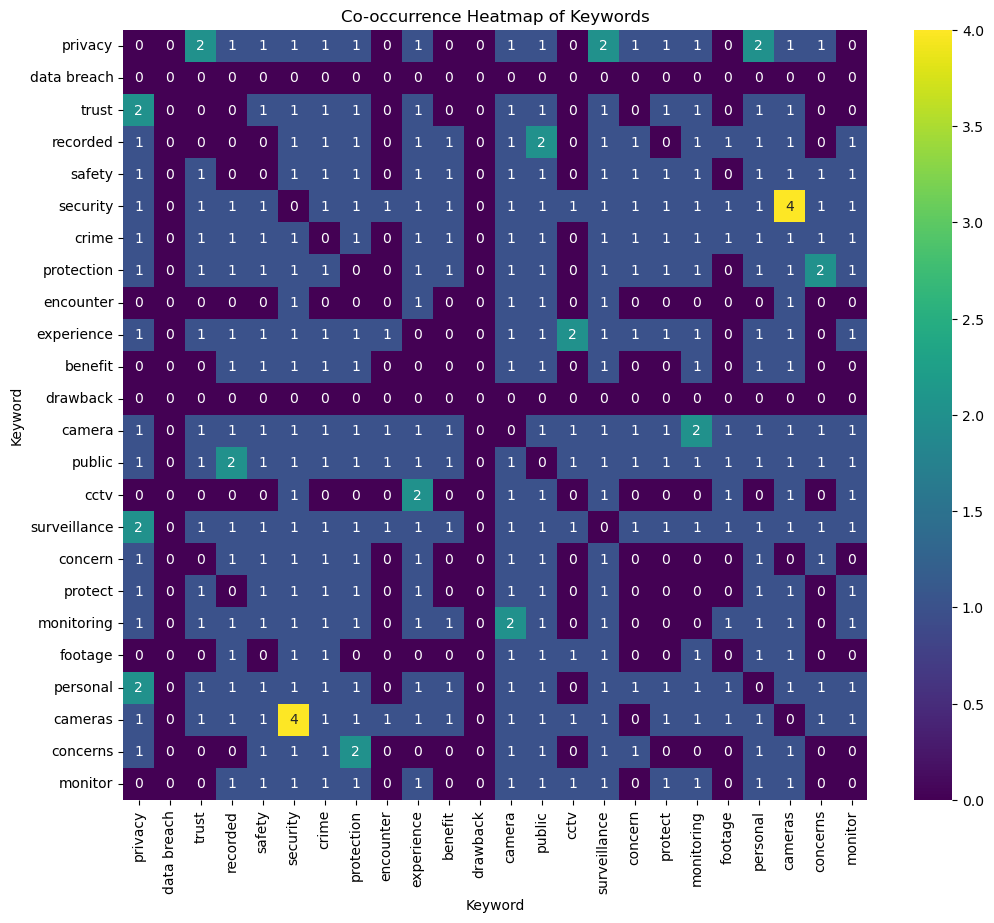

In [12]:


# Function to find co-occurrences
def find_cooccurrences(text, keywords):
    tokens = text.split()
    cooccurrences = defaultdict(int)
    for i, token in enumerate(tokens):
        if token in keywords:
            for j in range(max(0, i-5), min(len(tokens), i+6)):
                if tokens[j] != token and tokens[j] in keywords:
                    cooccurrences[(token, tokens[j])] += 1
    return cooccurrences

# Find co-occurrences in the dataset
cooccurrences = defaultdict(int)
for text in df['processed_text']:
    cooccurrences.update(find_cooccurrences(text, keywords))

# Convert co-occurrences to a matrix
cooc_matrix = np.zeros((len(keywords), len(keywords)))
keyword_index = {keyword: idx for idx, keyword in enumerate(keywords)}

for (kw1, kw2), count in cooccurrences.items():
    i, j = keyword_index[kw1], keyword_index[kw2]
    cooc_matrix[i, j] = count
    cooc_matrix[j, i] = count

# Plot the co-occurrence heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cooc_matrix, xticklabels=keywords, yticklabels=keywords, cmap='viridis', annot=True, fmt='g')
plt.title('Co-occurrence Heatmap of Keywords')
plt.xlabel('Keyword')
plt.ylabel('Keyword')
plt.show()
